In [1]:
import proplot as pplt
import psdist.visualization as psv
import torch

import mentflow as mf
from mentflow.utils import grab

In [2]:
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "viridis"
pplt.rc["figure.facecolor"] = "white"
pplt.rc["grid"] = False

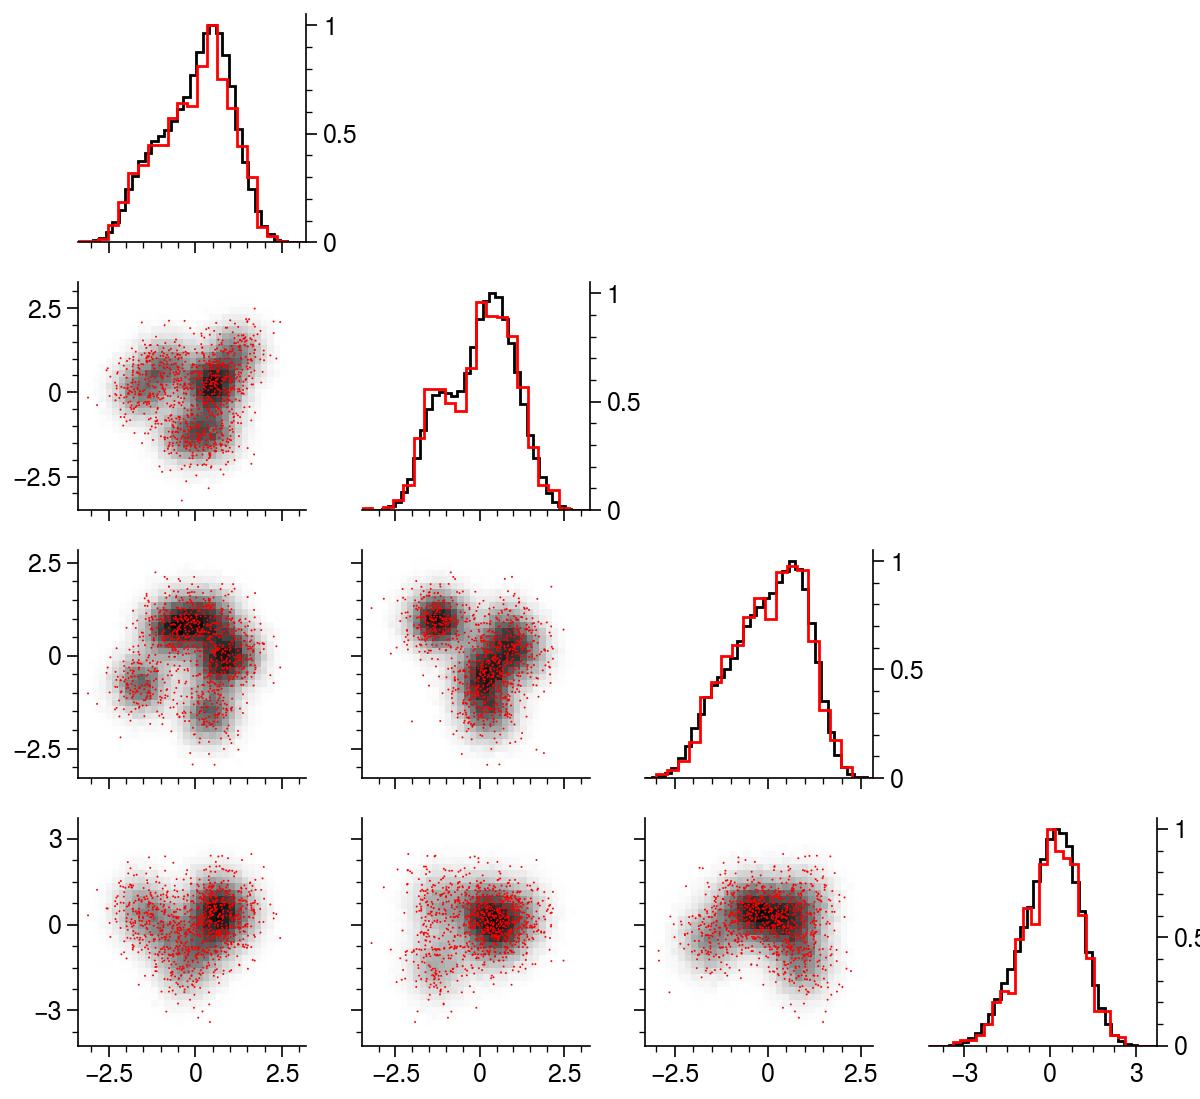

In [3]:
d = 4
n = 100000
n_bins = 35
n_samp = 1000
noise = 0.0

x = mf.dist.dist_nd.GaussianMixture(d=d).sample(n)
x = torch.squeeze(x)

histogram = torch.histogramdd(x, bins=n_bins, density=True)
hist = histogram.hist
bin_edges = histogram.bin_edges
bin_coords = [0.5 * (e[:-1] + e[1:]) for e in bin_edges]

x_samp = mf.sample.sample_hist(hist, bin_edges, n=n_samp, noise=noise)

if d == 1:
    fig, ax = pplt.subplots()
    ax.stairs(grab(hist), edges=grab(bin_edges[0]), lw=1.5, color="black")
    ax.hist(grab(x_samp), bins=grab(bin_edges[0]), density=True, lw=1.5, histtype="step", color="red")
else:
    grid = psv.CornerGrid(d, diag_rspine=True)
    grid.plot_image(grab(hist), coords=[grab(c) for c in bin_coords], cmap="mono")
    grid.plot_points(grab(x_samp), kind="scatter", s=0.5, c="red", diag_kws=dict(color="red"))